In [ ]:
__nbid__ = '0005'
__author__ = 'Ragadeepika Pucha <rpucha@arizona.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['desi_edr'] 
__keywords__ = ['sparcl', 'spectra', 'database']

# Introducción a la Publicación Temprana de Datos (EDR) de DESI en el Astro Data Lab

*Ragadeepika Pucha (U.Arizona), Stéphanie Juneau (NOIRLab), Alice Jacques (NOIRLab), Benjamin Weaver (NOIRLab) y el equipo de Astro Data Lab, con contribuciones de Anthony Kremin (LBL), Jaime E. Forero Romero (U. de los Andes), Stephen Bailey (LBL) y la Colaboración DESIn*

<div class="alert alert-block alert-info">
    <b>Importante: DESI DR1 ya está disponible y reemplaza a DESI EDR; por favor consulta 01_Intro_to_DESI_DR1.ipynb</b>
</div>

#### (_Traducción de [01_Intro_to_DESI_EDR.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/01_Intro_to_DESI_EDR.ipynb)_)
***

### Tabla de Contenido

* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones](#import)
* [Autenticación](#auth)
* [Base de datos DESI EDR](#desi_edr)
* [Accediendo a los objetivos de DESI](#desi_target_access)
    * [Seleccionando fuentes según la información de selección de objetivos](#target_info)
    * [Seleccionando fuentes en una región del cielo](#hpx_sel)
* [Accediendo y graficando los espectros de un objeto dado](#spectra_access)
* [Referencias](#ref)

<a class="anchor" id="goals"></a>
# Objetivos
En este notebook, exploraremos la Publicación Temprana de Datos (EDR por sus siglas en inglés, Early Data Release) de DESI en el Astro Data Lab. Mostraremos cómo acceder al catálogo de corrimientos al rojo desde la base de datos del Data Lab, cómo separar objetos según la información de selección de objetivos de DESI, cómo acceder a todos los espectros disponibles para un objeto dado utilizando [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/) (SPectra Analysis and Retrievable Catalog Lab), y finalmente cómo graficar el espectro "óptimo".

# Resumen

El Instrumento Espectroscópico de Energía Oscura (DESI, por sus siglas en inglés) es un espectrógrafo multiobjeto con 5000 fibras, construido por el Departamento de Energía (DOE). Está instalado en el telescopio Mayall de 4 metros en Kitt Peak, Arizona y se utiliza para llevar a cabo un mapeo que cubre aproximadamente 14,000 grados cuadrados del cielo durante 5 años (2021–2026).

La Publicación Temprana de Datos (EDR) de DESI incluye parte de los datos de comisionamiento y todos los datos de validación del survey (SV). Esto incluye SV1, SV2 y SV3 (el survey del Uno por Ciento) y está alojado en el Data Lab bajo la base de datos `desi_edr`.

Más información sobre DESI EDR está disponible tanto en el [sitio de documentación de datos de DESI](https://data.desi.lbl.gov/doc/) como en la [página de DESI en el Astro Data Lab](https://datalab.noirlab.edu/desi/).

En este notebook, mostraremos cómo acceder a las distintas tablas asociadas con esta base de datos para obtener información de selección y corrimientos al rojo de los objetivos y luego usar la base de datos espectral SPARCL para recuperar los espectros.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones

In [1]:
# importar algunos paquetes útiles de Python
import numpy as np

from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib 
import matplotlib.pyplot as plt

from getpass import getpass


%matplotlib inline

In [2]:
# Máscaras de objetivos DESI -
from desitarget.sv1 import sv1_targetmask    # Para SV1
from desitarget.sv2 import sv2_targetmask    # Para SV2
from desitarget.sv3 import sv3_targetmask    # Para SV3

# Módulos relacionados con DataLab
from sparcl.client import SparclClient
from dl import authClient as ac, queryClient as qc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
ac.whoAmI()

In [3]:
# Mejorando la apariencia de los gráficos con matplotlib
settings = {
    'font.size':22,
    'axes.linewidth':3.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':3.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':3.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

In [4]:
# Cargar el cliente de SPARCL
client = SparclClient()

announcement=Data set deprecation notice: on November 19, 2025 the SDSS/BOSS DR16 data sets were deprecated. Please use the new SDSS/BOSS DR17 data sets instead.


<a class="anchor" id="desi_edr"></a>
# Base de datos DESI EDR

El esquema `desi_edr` de la base de datos en el Data Lab consiste en varias tablas asociadas con los objetos.

In [5]:
print(qc.schema('desi_edr'))


Schema: desi_edr

      Table Name   Description
      ----------   -----------
        exposure   Summary quantities for every DESI exposure (2,480 rows)
     fiberassign   Quantities obtained when a DESI target is assigned to a fi
                   ber (2,829,277 rows)
           frame   Summary quantities for each petal of the DESI instrument i
                   n a given exposure; in normal operation there are ten fram
                   es for every exposure (70,256 rows)
      photometry   Photometric quantities from LS DR9 for every TARGETID (6,1
                   91,755 rows)
       potential   For a given tile, this table lists all targets that could 
                   have received a fiber assignment (18,127,881 rows)
          target   The quantities obtained when photometric objects are analy
                   zed in the target selection process (16,460,561 rows)
            tile   Summary quantities for every DESI tile (pointing on the sk
                   y) (732 r

Nos enfocaremos en la tabla `zpix` en este notebook. Esta es el principal catálogo de corrimientos al rojo del survey DESI. Contiene la información espectroscópica del objeto basada en espectros combinados, y se organiza por *healpix*. También contiene información de selección de objetivos.

A continuación vemos las columnas disponibles en esta tabla.

In [6]:
## Columnas en la tabla zpix
print(qc.schema('desi_edr.zpix'))


Schema: desi_edr
 Table: zpix

     Column Name   Description
     -----------   -----------
               z   Redshift measured by Redrock
            zerr   Redshift error from Redrock
            chi2   Best fit chi squared
         coeff_0   Redrock template coefficients
         coeff_1   Redrock template coefficients
         coeff_2   Redrock template coefficients
         coeff_3   Redrock template coefficients
         coeff_4   Redrock template coefficients
         coeff_5   Redrock template coefficients
         coeff_6   Redrock template coefficients
         coeff_7   Redrock template coefficients
         coeff_8   Redrock template coefficients
         coeff_9   Redrock template coefficients
       deltachi2   Delta-chi-squared for template fit from Redrock
   mean_fiber_ra   Mean (over exposures) RA of actual fiber position
  mean_fiber_dec   Mean (over exposures) DEC of actual fiber position
            elon   Ecliptic longitude
            elat   Ecliptic latitude


<a class="anchor" id="desi_target_access"></a>

# Accediendo a los objetos de DESI

Los espectros de DESI están identificados de forma única por tres atributos:

* **targetid**: identificador único para un objeto dado  
* **survey**: survey en el que fue observado el objeto. Puede ser _cmx_, _special_, _sv1_, _sv2_, o _sv3_.  
* **program**: PROGRAMA DE ASIGNACIÓN DE FIBRA. Describe las condiciones planificadas de observación. Puede ser _dark_, _bright_, o _backup_. En los casos de cmx y sv1 también puede ser _other_.

Las diferentes observaciones espectrales de un mismo objeto se combinan (coadd) dentro de cada survey y programa. Por lo tanto, algunos objetos pueden tener múltiples espectros combinados, y cada uno está asociado a un `targetid`, `survey` y `program`. El espectro “óptimo” para un objeto se indica con la columna `zcat_primary`.

Más información sobre el modelo de datos de los catálogos de corrimientos al rojo está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zpix-SURVEY-PROGRAM.html#).

In [7]:
query = """
SELECT zp.targetid, zp.survey, zp.program, zp.healpix,  
       zp.z, zp.zwarn, zp.coadd_fiberstatus, zp.spectype, 
       zp.mean_fiber_ra, zp.mean_fiber_dec, zp.zcat_nspec, 
       CAST(zp.zcat_primary AS INT), zp.desi_target,
       zp.sv1_desi_target, zp.sv2_desi_target, zp.sv3_desi_target
FROM desi_edr.zpix AS zp
""" 
# Información sobre la consulta
# Columnas seleccionadas --
# targetid, survey, program — identificadores únicos para un espectro dado
# healpix — número de healpix del objeto
# z — corrimiento al rojo espectroscópico del objeto
# zwarn — información codificada sobre el redshift (zwarn = 0 es bueno)
# coadd_fiberstatus — información codificada sobre la fibra asignada (coadd_fiberstatus = 0 es bueno)
# spectype — tipo espectral del objeto: STAR | GALAXY | QSO
# mean_fiber_ra, mean_fiber_dec — RA y Dec medias de la fibra tras todas las observaciones
# zcat_nspec — número de espectros combinados disponibles para un objeto
# zcat_primary — indica si un espectro es el principal (óptimo). ZCAT_PRIMARY = True para el “mejor”.
# CAST de esta columna a INT: ZCAT_PRIMARY = 1 para el espectro "óptimo".
# desi_target — codifica la información de selección del objeto en el survey principal
# sv1_desi_target — codifica la información de selección para sv1
# sv2_desi_target — codifica la información de selección para sv2
# sv3_desi_target — codifica la información de selección para sv3

In [8]:
print(query)


SELECT zp.targetid, zp.survey, zp.program, zp.healpix,  
       zp.z, zp.zwarn, zp.coadd_fiberstatus, zp.spectype, 
       zp.mean_fiber_ra, zp.mean_fiber_dec, zp.zcat_nspec, 
       CAST(zp.zcat_primary AS INT), zp.desi_target,
       zp.sv1_desi_target, zp.sv2_desi_target, zp.sv3_desi_target
FROM desi_edr.zpix AS zp



In [9]:
zpix = qc.query(sql = query, fmt = 'table')

In [10]:
print(f"La tabla resultante tiene {len(zpix)} filas")
zpix[0:5]

La tabla resultante tiene 2044588 filas


targetid,survey,program,healpix,z,zwarn,coadd_fiberstatus,spectype,mean_fiber_ra,mean_fiber_dec,zcat_nspec,zcat_primary,desi_target,sv1_desi_target,sv2_desi_target,sv3_desi_target
int64,str7,str6,int64,float64,int64,int64,str6,float64,float64,int64,int64,int64,int64,int64,int64
39633414185291967,sv3,dark,15341,0.6555981990098714,0,0,GALAXY,273.42926,62.27449,1,1,0,0,0,8457
39633414185291844,sv3,bright,15341,0.026610786749721827,0,0,GALAXY,273.41397,62.304092,1,1,0,0,0,5764607523034234880
39633414185291911,sv3,bright,15341,0.1815527832416608,0,0,GALAXY,273.42245,62.34335,1,1,0,0,0,1152921504606846976
39633414185291937,sv3,dark,15341,0.8321858435838179,0,0,GALAXY,273.4253,62.346302,1,1,0,0,0,8457
39633416995473409,sv3,dark,15352,0.6739049813320204,4,0,GALAXY,273.4549,62.377106,1,1,0,0,0,4611686018427388932


In [11]:
# Verificar cuántas filas tienen targetid únicos antes/después de aplicar ZCAT_PRIMARY
print(f"Número total de filas: {len(zpix)}")
print(f"Número de targetids únicos: {len(np.unique(zpix['targetid']))}")

is_primary = zpix['zcat_primary']==1

print(f"Número de filas con ZCAT_PRIMARY=True: {len(zpix[is_primary])}")

Número total de filas: 2044588
Número de targetids únicos: 1979269
Número de filas con ZCAT_PRIMARY=True: 1979269


In [12]:
# Seleccionar solo objetos únicos
zpix_cat = zpix[is_primary]

<a class="anchor" id="target_info"></a>
## Seleccionando objetos según la información de selección

Los objetos de DESI se dividen en cinco clases principales:

* **MWS**: *Milky Way Survey* — observa estrellas en la Vía Láctea.  
* **BGS**: *Bright Galaxy Survey* — observa galaxias brillantes en el universo cercano.  
* **LRG**: *Luminous Red Galaxies*  - Galaxias Rojas Luminosas
* **ELG**: *Emission Line Galaxies*  - Galaxias con Líneas de Emisión
* **QSO**: *Quásares*

[Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract) describe en más detalle la selección de objetos y su información.

Las columnas `*DESI_TARGET` codifican a qué clase pertenece cada objeto. Ten en cuenta que algunos objetos pueden pertenecer a múltiples clases.

Los *targetmasks* (máscaras de objeto) contienen la codificación por bits para las diferentes clases de selección.  
Además de estas clases principales, existen objetos secundarios que forman parte de programas de propuesta de fibra secundaria. Estos están codificados bajo `SECONDARY PROGRAM`

In [13]:
# Los bits de selección están codificados en sv*_targetmask.desi_mask
sv1_targetmask.desi_mask

sv1_desi_mask:
  - [LRG,              0, "LRG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 2}]
  - [ELG,              1, "ELG", {'obsconditions': 'DARK|GRAY', 'priorities': {'UNOBS': 3000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3000, 'MORE_ZGOOD': 3000}, 'numobs': 1}]
  - [QSO,              2, "QSO", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3400, 'MORE_ZGOOD': 3350, 'MORE_ZWARN': 3300, 'MORE_MIDZQSO': 100, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 4}]
  - [LRG_OPT,          3, "LRG from baseline version of optical cuts", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MORE_ZGOOD': 3200}, 'numobs': 4}]
  - [LRG_IR,           4, "LRG from baseline version of IR cuts", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 3200, 'MO

In [14]:
# Algunos ejemplos de valores de máscaras de bits

print(sv1_targetmask.desi_mask.mask("STD_FAINT"), sv1_targetmask.desi_mask.mask("STD_BRIGHT"), sv1_targetmask.desi_mask.mask("STD_FAINT|STD_BRIGHT"))
print(2**33, 2**35, 2**33 + 2**35)

8589934592 34359738368 42949672960
8589934592 34359738368 42949672960


In [15]:
# La información de selección está en las columnas desi_target correspondientes
# sv1_targetmask.desi_mask corresponde a SV1_DESI_TARGET
# sv2_targetmask.desi_mask corresponde a SV2_DESI_TARGET
# sv3_targetmask.desi_mask corresponde a SV3_DESI_TARGET

sv1_desi_tgt = zpix_cat['sv1_desi_target']
sv2_desi_tgt = zpix_cat['sv2_desi_target']
sv3_desi_tgt = zpix_cat['sv3_desi_target']

# Máscaras de bits de DESI
sv1_desi_mask = sv1_targetmask.desi_mask
sv2_desi_mask = sv2_targetmask.desi_mask
sv3_desi_mask = sv3_targetmask.desi_mask

In [16]:
# Seleccionando de candidatos - 

is_bgs = (sv1_desi_tgt & sv1_desi_mask['BGS_ANY'] != 0)|(sv2_desi_tgt & sv2_desi_mask['BGS_ANY'] != 0)|(sv3_desi_tgt & sv3_desi_mask['BGS_ANY'] != 0)
is_lrg = (sv1_desi_tgt & sv1_desi_mask['LRG'] != 0)|(sv2_desi_tgt & sv2_desi_mask['LRG'] != 0)|(sv3_desi_tgt & sv3_desi_mask['LRG'] != 0)
is_elg = (sv1_desi_tgt & sv1_desi_mask['ELG'] != 0)|(sv2_desi_tgt & sv2_desi_mask['ELG'] != 0)|(sv3_desi_tgt & sv3_desi_mask['ELG'] != 0)
is_qso = (sv1_desi_tgt & sv1_desi_mask['QSO'] != 0)|(sv2_desi_tgt & sv2_desi_mask['QSO'] != 0)|(sv3_desi_tgt & sv3_desi_mask['QSO'] != 0)
is_mws = (sv1_desi_tgt & sv1_desi_mask['MWS_ANY'] != 0)|(sv2_desi_tgt & sv2_desi_mask['MWS_ANY'] != 0)|(sv3_desi_tgt & sv3_desi_mask['MWS_ANY'] != 0)
is_scnd = (sv1_desi_tgt & sv1_desi_mask['SCND_ANY'] != 0)|(sv2_desi_tgt & sv2_desi_mask['SCND_ANY'] != 0)|(sv3_desi_tgt & sv3_desi_mask['SCND_ANY'] != 0)

In [17]:
# Número de objetos por tipo
n_bgs = len(zpix_cat[is_bgs])
n_lrg = len(zpix_cat[is_lrg])
n_elg = len(zpix_cat[is_elg])
n_qso = len(zpix_cat[is_qso])
n_mws = len(zpix_cat[is_mws])
n_scnd = len(zpix_cat[is_scnd])

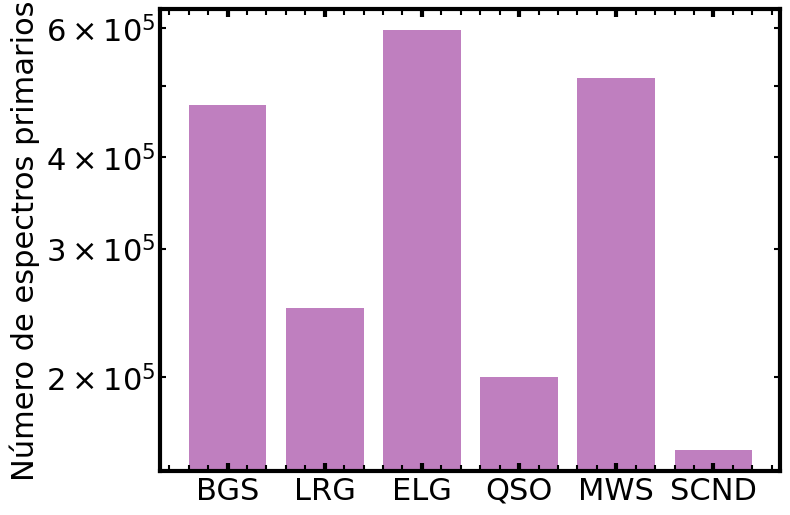

In [18]:
# Visualicemos los números - 

plt.figure(figsize = (8,6))

targets = ['BGS', 'LRG', 'ELG', 'QSO', 'MWS', 'SCND']
numbers = [n_bgs, n_lrg, n_elg, n_qso, n_mws, n_scnd]

plt.bar(targets, numbers, color = 'purple', alpha = 0.5)
plt.ylabel('Número de espectros primarios')
plt.yscale('log')

Text(0.5, 0, 'Corrimiento al rojo (z)')

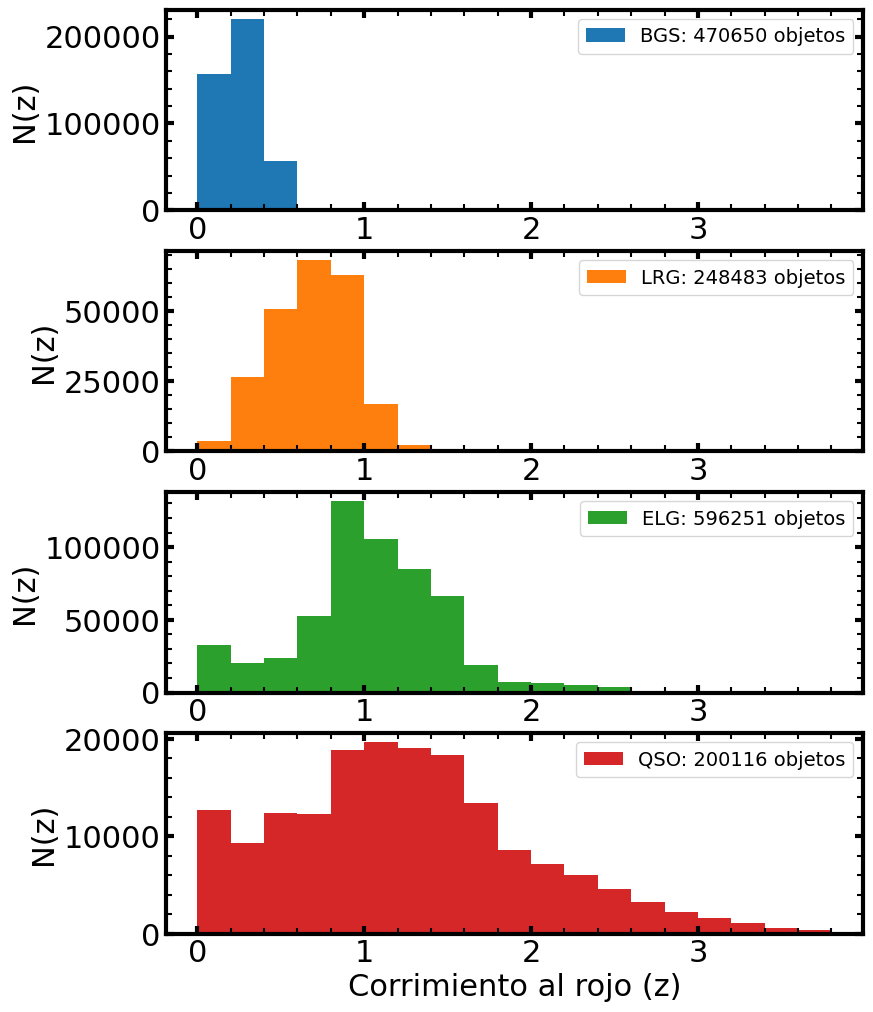

In [19]:
# Echemos un vistazo a la distribución de corrimientos al rojo (z)s -

fig, axs = plt.subplots(4, 1, figsize = (9, 12))
bins = np.arange(0, 4, 0.2)

axs[0].hist(zpix_cat['z'][is_bgs], color = 'C0', bins = bins, label = f'BGS: {n_bgs} objetos')
axs[0].legend(fontsize = 14)
axs[0].set_ylabel("N(z)")
axs[1].hist(zpix_cat['z'][is_lrg], color = 'C1', bins = bins, label = f'LRG: {n_lrg} objetos')
axs[1].legend(fontsize = 14)
axs[1].set_ylabel("N(z)")
axs[2].hist(zpix_cat['z'][is_elg], color = 'C2', bins = bins, label = f'ELG: {n_elg} objetos')
axs[2].legend(fontsize = 14)
axs[2].set_ylabel("N(z)")
axs[3].hist(zpix_cat['z'][is_qso], color = 'C3', bins = bins, label = f'QSO: {n_qso} objetos')
axs[3].legend(fontsize = 14)
axs[3].set_ylabel("N(z)")
axs[3].set_xlabel("Corrimiento al rojo (z)")


### Otras máscaras

`desi_mask` contiene la información más general sobre la selección de objetos en DESI.  
Sin embargo, existen subclases de objetos.  

Por ejemplo, BGS tiene diferentes máscaras de objetos dependiendo del criterio de selección.  
Cada una de las propuestas de objetos secundarios también tiene sus propias máscaras.  
Pueden seleccionarse de forma similar a como se hizo arriba, pero usando las columnas respectivas (como `SV1_BGS_TARGET` o `SV1_SCND_TARGET`) en la tabla `target`.

Más información sobre las máscaras de bits en DESI está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html).

In [20]:
## Máscaras de objetos BGS
sv1_targetmask.bgs_mask.names()

['BGS_FAINT',
 'BGS_BRIGHT',
 'BGS_FAINT_EXT',
 'BGS_LOWQ',
 'BGS_FIBMAG',
 'BGS_FAINT_NORTH',
 'BGS_BRIGHT_NORTH',
 'BGS_FAINT_EXT_NORTH',
 'BGS_LOWQ_NORTH',
 'BGS_FIBMAG_NORTH',
 'BGS_FAINT_SOUTH',
 'BGS_BRIGHT_SOUTH',
 'BGS_FAINT_EXT_SOUTH',
 'BGS_LOWQ_SOUTH',
 'BGS_FIBMAG_SOUTH',
 'BGS_KNOWN_ANY',
 'BGS_KNOWN_COLLIDED',
 'BGS_KNOWN_SDSS',
 'BGS_KNOWN_BOSS']

In [21]:
## Máscaras de objetos secundarios
sv1_targetmask.scnd_mask.names()

['VETO',
 'UDG',
 'FIRST_MALS',
 'QSO_RED',
 'M31_KNOWN',
 'M31_QSO',
 'M31_STAR',
 'MWS_CLUS_GAL_DEEP',
 'LOW_MASS_AGN',
 'FAINT_HPM',
 'PV_BRIGHT',
 'PV_DARK',
 'LOW_Z',
 'BHB',
 'SPCV',
 'DC3R2_GAMA',
 'UNWISE_BLUE',
 'UNWISE_GREEN',
 'HETDEX_MAIN',
 'HETDEX_HP',
 'PSF_OUT_BRIGHT',
 'PSF_OUT_DARK',
 'HPM_SOUM',
 'SN_HOSTS',
 'GAL_CLUS_BCG',
 'GAL_CLUS_2ND',
 'GAL_CLUS_SAT',
 'HSC_HIZ_SNE',
 'ISM_CGM_QGP',
 'STRONG_LENS',
 'WISE_VAR_QSO',
 'MWS_CALIB',
 'BACKUP_CALIB',
 'MWS_MAIN_CLUSTER_SV',
 'MWS_RRLYR',
 'BRIGHT_HPM',
 'WD_BINARIES_BRIGHT',
 'WD_BINARIES_DARK',
 'LBG_TOMOG_XMM',
 'LBG_TOMOG_W3',
 'UNWISE_GREEN_II_3700',
 'UNWISE_GREEN_II_3800',
 'UNWISE_GREEN_II_3900',
 'UNWISE_GREEN_II_4000',
 'UNWISE_BLUE_FAINT_II',
 'UNWISE_BLUE_BRIGHT_II',
 'DESILBG_TMG_FINAL',
 'DESILBG_G_FINAL',
 'DESILBG_BXU_FINAL',
 'LBG_TOMOG_COSMOS_FINAL',
 'BRIGHT_TOO',
 'DARK_TOO']

<a class="anchor" id="hpx_sel"></a>
## Seleccionando objetos en una región del cielo
Los objetos están organizados por diferentes regiones *healpix* en el cielo.  
Aquí seleccionamos todos los objetos dentro de una región healpix específica.  
También sobreponemos los objetos del *Milky Way Survey* en esa región.

In [22]:
hpx = 26279      

sel = (zpix_cat['healpix'] == hpx)
tsel = zpix_cat[sel]

In [23]:
## Seleccionar objetos MWS en esta región
is_mws = (tsel['sv1_desi_target'] & sv1_targetmask.desi_mask['MWS_ANY'] != 0)|(tsel['sv2_desi_target'] & sv2_targetmask.desi_mask['MWS_ANY'] != 0)|(tsel['sv3_desi_target'] & sv3_targetmask.desi_mask['MWS_ANY'] != 0)

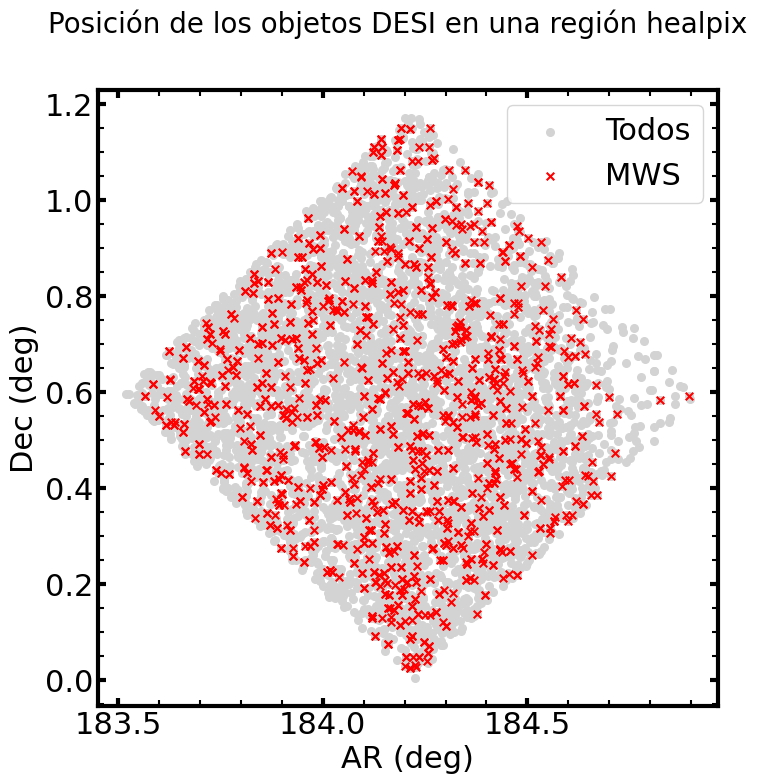

In [24]:
plt.figure(figsize = (8, 8))

plt.suptitle('Posición de los objetos DESI en una región healpix', fontsize = 20)
plt.scatter(tsel['mean_fiber_ra'], tsel['mean_fiber_dec'], color = 'lightgrey', s = 30, label = 'Todos')
plt.scatter(tsel['mean_fiber_ra'][is_mws], tsel['mean_fiber_dec'][is_mws], color = 'r', s = 30, marker = 'x', label = 'MWS')
plt.xlabel('AR (deg)')
plt.ylabel('Dec (deg)')
plt.legend()

<a class="anchor" id="spectra_access"></a>
# Accediendo y graficando los espectros de un objeto dado

Finalmente, mostramos cómo acceder a todos los espectros combinados (*coadded*) de un objeto dado.  
También mostramos cómo seleccionar el espectro "óptimo".

Utilizamos **SPARCL**, un servicio rápido para acceso espectral provisto por el Data Lab.  
Puedes encontrar detalles sobre cómo utilizar SPARCL en este [notebook de ejemplo](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb).

In [25]:
# Seleccionar una estrella con más de 3 espectros combinados
jj = (zpix_cat['zcat_nspec'] > 3)&(zpix_cat['spectype'] == 'STAR')
tsel = zpix_cat[jj]

In [26]:
len(tsel)

308

In [27]:
# Seleccionar un objeto al azar

ii = 118
targetid = int(tsel['targetid'].data[ii])   ## SPARCL solo acepta enteros tipo Python

In [28]:
## Recuperar espectros

inc = ['specid', 'redshift', 'flux', 'wavelength', 'spectype', 'specprimary', 'survey', 'program', 'targetid', 'coadd_fiberstatus']
res = client.retrieve_by_specid(specid_list = [targetid],
                                include = inc,
                                dataset_list = ['DESI-EDR'])

In [29]:
# Verificar que se hayan recuperado todos los espectros

print('Número de espectros combinados: ', tsel['zcat_nspec'].data[ii])
print('Número de registros recuperados: ', len(res.records))

Número de espectros combinados:  4
Número de registros recuperados:  4


In [30]:
res

Retrieved Results: 4 records

In [31]:
records = res.records

# Seleccionar el espectro primario
spec_primary = np.array([records[jj].specprimary for jj in range(len(records))])

primary_ii = np.where(spec_primary == True)[0][0]

In [32]:
lam_primary = records[primary_ii].wavelength
flam_primary = records[primary_ii].flux

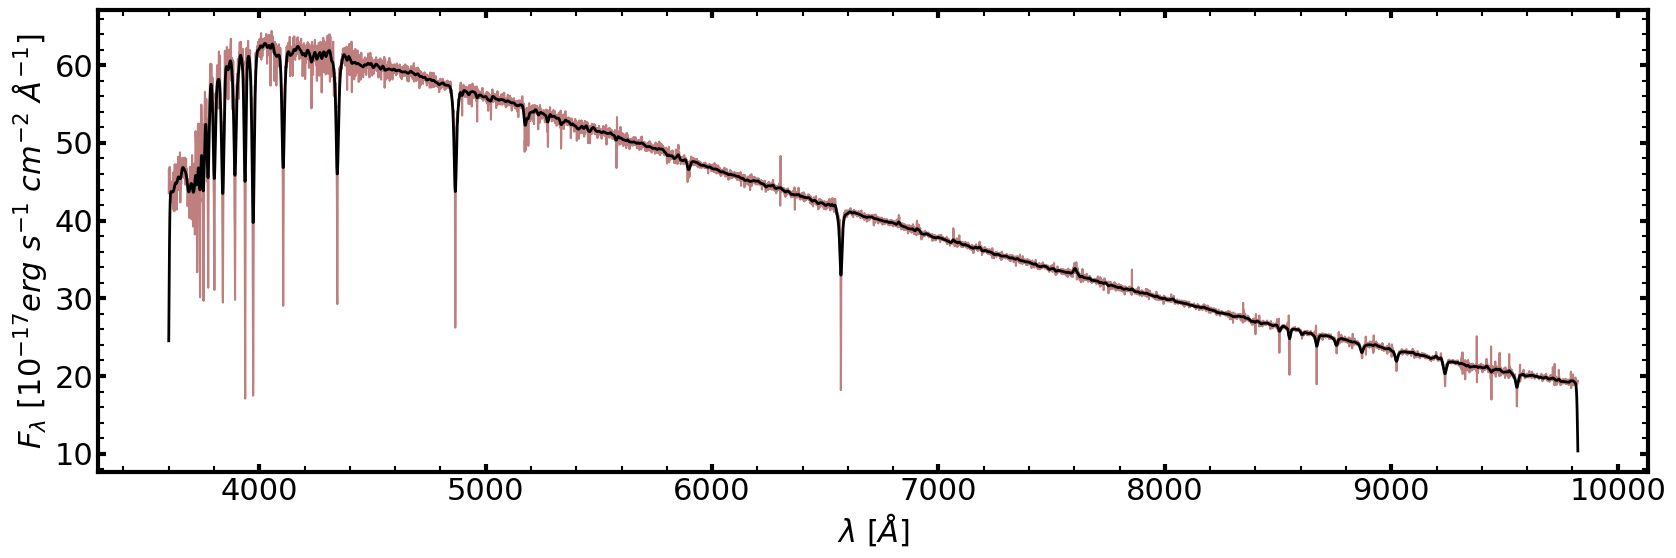

In [33]:
# Graficar el espectro -

plt.figure(figsize = (20, 6))
# Espectro de los tres brazos (B, R, Z) en color vinotinto
plt.plot(lam_primary, flam_primary, color = 'maroon', alpha = 0.5)

# Espectro suavizado (convolución gaussiana) en negro
plt.plot(lam_primary, convolve(flam_primary, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

Ahora graficamos todos los espectros disponibles para este objeto.  
En cada panel se indica el `survey`, el `program` y si es el espectro primario.

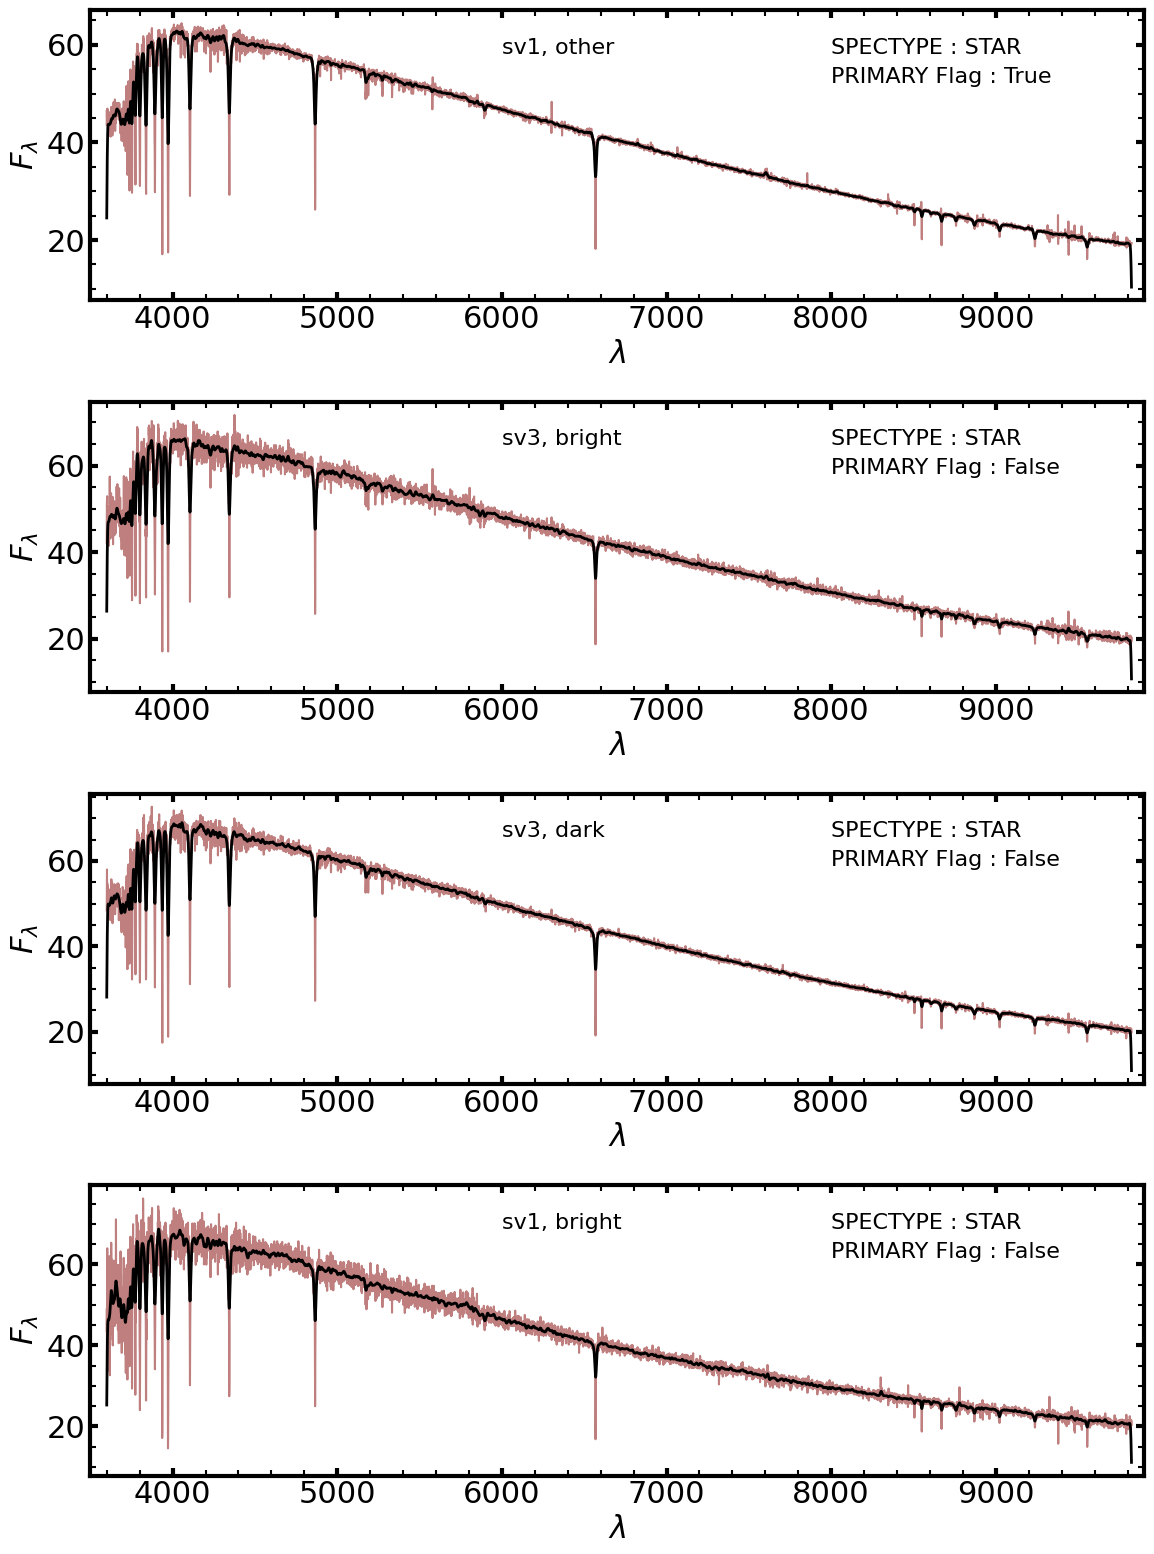

In [34]:
# Número de espectros -
n = len(records)

fig, ax = plt.subplots(n, 1, figsize = (12,(4*n)))

for jj in range(n):
    survey = records[jj].survey
    program = records[jj].program
    spectype = records[jj].spectype
    primary_flag = records[jj].specprimary

    lam = records[jj].wavelength
    flam = records[jj].flux
    
    # Graficar el espectro en vinotinto
    ax[jj].plot(lam, flam, color = 'maroon', alpha = 0.5)
    # Graficar encima el espectro suavizado
    ax[jj].plot(lam, convolve(flam, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
    ax[jj].set(xlim = [3500, 9900], xlabel = '$\lambda$', ylabel = '$F_{\lambda}$')
    trans = ax[jj].get_xaxis_transform()
    ax[jj].annotate(f'{survey}, {program}', xy = (6000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'SPECTYPE : {spectype}', xy = (8000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'PRIMARY Flag : {primary_flag}', xy = (8000, 0.75), xycoords = trans, fontsize = 16)
    
plt.tight_layout()

Del gráfico anterior, vemos que el espectro con `PRIMARY Flag = True` es el que tiene mayor relación señal/ruido.  
Los otros espectros disponibles son más ruidosos en comparación con el “óptimo”.

Se observa que los dos registros SV1 de este objeto no tienen espectro. Verificamos su estado de fibra a continuación:

In [35]:
print('Estado de fibra en el apilado de la observación oscura SV1: ', records[0].coadd_fiberstatus)
print('Estado de fibra en el apilado de la observación brillante SV1: ', records[3].coadd_fiberstatus)

Estado de fibra en el apilado de la observación oscura SV1:  0
Estado de fibra en el apilado de la observación brillante SV1:  0


El campo `coadd_fiberstatus` contiene [información sobre las condiciones de la fibra](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html#spectroscopic-reduction-masks) durante la observación espectroscópica.  
`coadd_fiberstatus = 512` indica malas condiciones de fibra, lo que produce espectros vacíos (flux = 0, ivar = 0).  
Esto demuestra la importancia de acceder al espectro "óptimo" para realizar análisis científicos.

<a class="anchor" id="ref"></a>
# Referencias

* Documentación de DESI EDR: [https://data.desi.lbl.gov/doc/](https://data.desi.lbl.gov/doc/)
* Página de DESI EDR en Astro Data Lab: [https://datalab.noirlab.edu/desi/](https://datalab.noirlab.edu/desi/)
* Información sobre SPARCL: [https://astrosparcl.datalab.noirlab.edu/sparc/](https://astrosparcl.datalab.noirlab.edu/sparc/)
* Información sobre el modelo de datos: [https://desidatamodel.readthedocs.io/en/latest/](https://desidatamodel.readthedocs.io/en/latest/)
    * [`tiles-fuji.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/tiles-SPECPROD.html)
    * [`exposures-fuji.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/exposures-SPECPROD.html)
    * [Catálogos de corrimiento al rojo](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/index.html)
    * [`zall-pix-fuji.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zall-pix-SPECPROD.html)
    * [`zall-tilecumulative-fuji.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zall-tilecumulative-SPECPROD.html)
    * [`zpix-SURVEY-PROGRAM.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zpix-SURVEY-PROGRAM.html)
    * [`ztile-SURVEY-PROGRAM-GROUPTYPE.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zpix-SURVEY-PROGRAM.html)
    * [`coadd-SURVEY-PROGRAM-PIXNUM.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/healpix/SURVEY/PROGRAM/PIXGROUP/PIXNUM/coadd-SURVEY-PROGRAM-PIXNUM.html)
    * [`redshift-SURVEY-PROGRAM-PIXNUM.fits`](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/healpix/SURVEY/PROGRAM/PIXGROUP/PIXNUM/redrock-SURVEY-PROGRAM-PIXNUM.html)
* Información sobre máscaras de bits de DESI: [https://desidatamodel.readthedocs.io/en/latest/bitmasks.html](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html)
* Artículo sobre la selección de objetivos de DESI: [Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract)
* Notebook de introducción a SPARCL: [https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb](https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/SPARCL/Como_usar_SPARCL.ipynb)